## HOMEWORK 12

## Binary Traffic Sign Classification

In [9]:
import os
import cv2
import numpy as np
from time import time
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

plt.rcParams['figure.figsize'] = [15, 6]

#### Data Loading

In [2]:
folder = 'data/subset_homework'

# Load traffic sign class 0
fnames_0 = os.listdir(os.path.join(folder, 'class_id_0'))
images_0 = [cv2.imread(os.path.join(folder, 'class_id_0', f), cv2.IMREAD_UNCHANGED) for f in fnames_0]
labels_0 = [0] * len(images_0)

# Load traffic sign class 1
fnames_1 = os.listdir(os.path.join(folder, 'class_id_1'))
images_1 = [cv2.imread(os.path.join(folder, 'class_id_1', f), cv2.IMREAD_UNCHANGED) for f in fnames_1]
labels_1 = [1] * len(images_1)

#### Prepare Input Data

In [3]:
# Put both classes together and shuffle the data
images = images_0 + images_1
labels = labels_0 + labels_1
images, labels = shuffle(images, labels)

images = np.array(images)
labels = np.array(labels)
pixels = np.array([image.flatten() for image in images])/255

print('Shape', pixels.shape)

Shape (4470, 784)


#### Building the Neural Network

In [4]:
# Assuming 'labels' contain integer class labels
labels = to_categorical(labels, 20)

# Define the input layer, with the shape corresponding to the number of pixels in images
inputs = Input(shape=(pixels.shape[1],))

# Define the output layer, a 20 neurons with linear activation function
outputs = Dense(20, activation="linear")(inputs)

# Create model
model = Model(inputs, outputs)

# Output a summary of model's architecture
model.summary()

# Compile model with the Adam optimisation algorithm and mean squared error as the loss function 
model.compile(optimizer='adam', loss='mean_squared_error')

# Define an EarlyStopping callback that will stop training when there is no improvement in validation loss for 10 consecutive epochs
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=10, verbose=1)

# Fit the model to the data, 
# specifying the features (pixels), target (labels), number of epochs, and batch size
# The EarlyStopping callback is included, and 20% of the training data is reserved for validation.
# The validation set is used to monitor for overfitting during training, and the `EarlyStopping` callback uses it 
# to decide when to stop training based on the performance on the validation set
model.fit(
    pixels,
    labels,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
    validation_split=0.2
)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 20)             │        15,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,700 (61.33 KB)

 Trainable params: 15,700 (61.33 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1093 - val_loss: 0.0416
Epoch 2/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0381 - val_loss: 0.0333
Epoch 3/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0296 - val_loss: 0.0267
Epoch 4/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0252 - val_loss: 0.0232
Epoch 5/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0218 - val_loss: 0.0206
Epoch 6/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0194 - val_loss: 0.0197
Epoch 7/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0172 - val_loss: 0.0172
Epoch 8/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0162 - val_loss: 0.0175
Epoch 9/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0157 - val_loss: 0.0152
Epoch 10/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0142 - val_loss: 0.0149
Epoch 11/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0134 - val_loss: 0.0146
Epoch 12/100
112/112 ━━━━━━━━━━━━━━━━━━━━

In [5]:
# Set the image index value
idx = 50

# Use the model to predict the class of the image.
pred = model.predict(pixels[idx:idx+1, ...])

print(pred, labels[idx])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
[[ 1.3384147e+00 -3.0340642e-01  1.7200913e-02  7.0716059e-03
  -2.8699473e-03  7.8288801e-03  1.8272454e-02 -2.3909345e-02
  -6.7834491e-03 -3.1485804e-04 -3.9788634e-02  2.0642117e-02
  -1.2078474e-04 -1.8187866e-02 -1.7822677e-02 -3.6915120e-02
   2.8930139e-03 -2.5629927e-03 -7.9484219e-03  1.4873325e-02]] [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [6]:
# Run it on the entire dataset
predictions = model.predict(pixels).squeeze()
predictions = predictions > 0.5

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [7]:
predictions_arr = np.array(predictions)
labels_arr = np.array(labels)

# Change from probabilities to actual class predictions
predictions_arr = np.argmax(predictions_arr, axis=1)

# Changing from one-hot encoded labels to actual class labels
labels_arr = np.argmax(labels_arr, axis=1)

correct = np.sum(predictions_arr == labels_arr)
accuracy = correct / len(labels_arr)

print('Accuracy', accuracy)

Accuracy 0.976062639821029


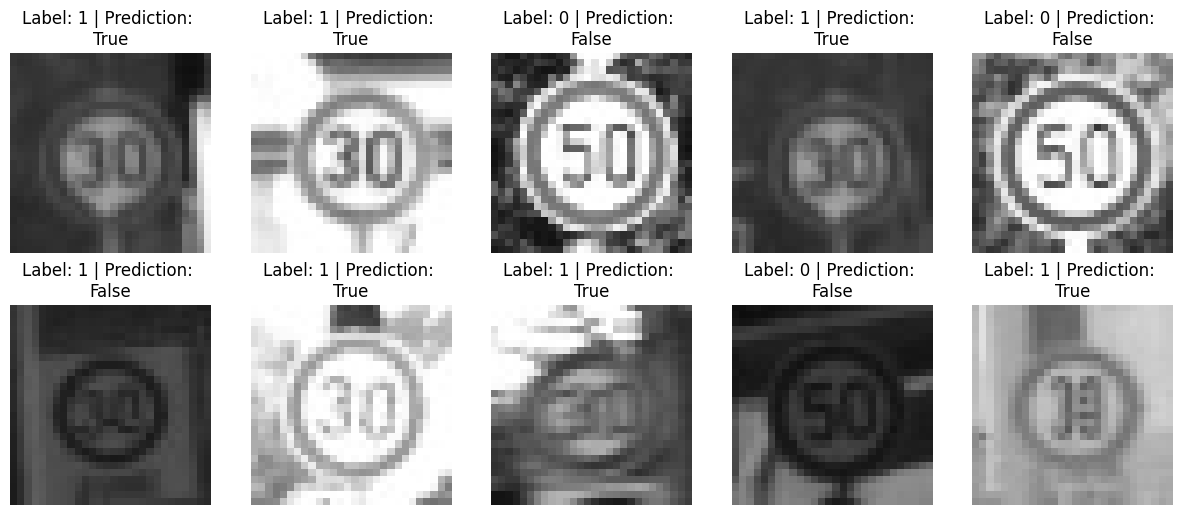

In [8]:
for cnt, idx in enumerate(np.random.randint(0, len(images), 10)): 
    plt.subplot(2,5,cnt+1), plt.imshow(images[idx], cmap='gray', vmin=0, vmax=255)
    plt.title('Label: ' + str(int(labels[idx][0])) + ' | Prediction: ' + '\n' + str(predictions[idx][0]) )
    plt.axis(False)

##### The maximum accuracy I could achieve while playing with the network was 0.976062639821029